In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn.neighbors as sn
import skimage.transform as skt
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import os


# Feature extraction (Radon Transform)

In [115]:
feature_array = []
label_array = []

In [116]:
directory = 'Chess_formatted'

for _classname in sorted(os.listdir(directory)):
    for _name in sorted(os.listdir(directory + '/' + _classname)):
        path = directory + '/' + str(_classname) + '/' + str(_name)

        #Convert color and resize color
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)

        #Transform image to radon
        tta = np.linspace(0., 180., max(img.shape), endpoint=False)
        sinogram = skt.radon(img, theta=tta)

        feature_array.append(np.array(sinogram).reshape(-1,1))
        label_array.append(_classname)
        
feature_array = np.array(feature_array).reshape(554,-1)
label_array = np.array(label_array)




C:\Users\Tunwongchai\anaconda3\lib\site-packages\skimage\transform\radon_transform.py:83: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


# Split Train and Test

In [117]:
from sklearn.model_selection import train_test_split

train, test, train_label, test_label = train_test_split(feature_array, label_array, test_size=0.2, random_state=7)

# Train

## KNN Model

In [118]:
clf_knn = sn.KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf_knn.fit(train, train_label)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

## SVM Model

In [119]:
clf_svm = svm.SVC(kernel='poly', degree=2, C=1, decision_function_shape='ovo',)
clf_svm.fit(train, train_label)

SVC(C=1, decision_function_shape='ovo', degree=2, kernel='poly')

## Naive Bayes Model

In [120]:
clf_nab = GaussianNB()
clf_nab.fit(train, train_label)

GaussianNB()

# Test

In [121]:
pred_knn = clf_knn.predict(test)
pred_svm = clf_svm.predict(test)
pred_nab = clf_nab.predict(test)

## Accuracy

In [123]:
from sklearn.metrics import accuracy_score

score_knn = round(accuracy_score(test_label, pred_knn),2)
score_svm = round(accuracy_score(test_label, pred_svm),2)
score_nab = round(accuracy_score(test_label, pred_nab),2)

print("KNN Model Accuracy:", score_knn)
print("SVM Model Accuracy:", score_svm)
print("Naive Bayes Model Accuracy:", score_nab)

KNN Model Accuracy: 0.18
SVM Model Accuracy: 0.28
Naive Bayes Model Accuracy: 0.16


## Confusion Matrix plot


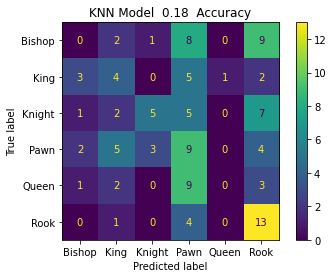

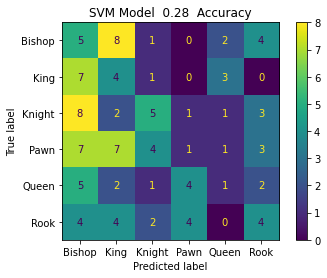

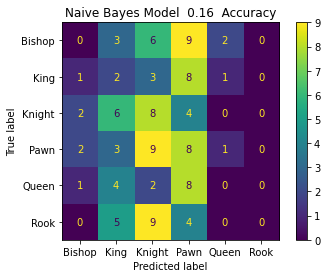

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_svm = confusion_matrix(test_label, pred_knn)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=clf_svm.classes_)

cm_knn = confusion_matrix(test_label, pred_svm)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=clf_knn.classes_)

cm_nab = confusion_matrix(test_label, pred_nab)
disp_nab = ConfusionMatrixDisplay(confusion_matrix=cm_nab, display_labels=clf_nab.classes_)

disp_knn.plot()
disp_knn.ax_.set_title('KNN Model  '+str(score_knn)+'  Accuracy')

disp_svm.plot()
disp_svm.ax_.set_title('SVM Model  '+str(score_svm)+'  Accuracy')

disp_nab.plot()
disp_nab.ax_.set_title('Naive Bayes Model  '+str(score_nab)+'  Accuracy')

plt.show()